# Desafio Técnico - Trainee Digital

### Merge e diferença:

In [1]:
import pandas as pd

In [2]:
xlsx = pd.ExcelFile('dados.xlsx')


In [3]:
df = pd.read_excel(xlsx, 'realizado')
df

,Mes_1,Mes_2,Mes_3,Mes_4,Mes_5,Mes_6,Mes_7,Mes_8,Mes_9,Mes_10,Mes_11,Mes_12
NaN,janeiro,fevereiro,março,abril,maio,junho,julho,agosto,setembro,outubro,novembro,dezembro
Realizado,240,280,200,310,230,213,239,210,210,210,232,213


In [4]:
df2 = pd.read_excel(xlsx, 'orcado')
df2

,mês,orcado
0,janeiro,330
1,fevereiro,290
2,março,230
3,abril,321
4,maio,283
5,junho,291
6,julho,193
7,agosto,259
8,setembro,289
9,outubro,230


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
type(df2)

pandas.core.frame.DataFrame

In [7]:
df.shape

(2, 12)

In [8]:
df2.shape

(12, 2)

In [9]:
df.shape

(2, 12)

In [10]:
df

,Mes_1,Mes_2,Mes_3,Mes_4,Mes_5,Mes_6,Mes_7,Mes_8,Mes_9,Mes_10,Mes_11,Mes_12
NaN,janeiro,fevereiro,março,abril,maio,junho,julho,agosto,setembro,outubro,novembro,dezembro
Realizado,240,280,200,310,230,213,239,210,210,210,232,213


In [11]:
data = {'mês': ['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho', 'julho', 'agosto', 'setembro', 'outubro', 'novembro', 'dezembro'],
        'orcado': [330, 290, 230, 321, 283, 291, 193, 259, 289, 230, 434, 421]}

In [12]:
data2 = {'mês': ['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho', 'julho', 'agosto', 'setembro', 'outubro', 'novembro', 'dezembro'],
        'realizado': [240, 280, 200, 310, 230, 213, 239, 210, 210, 210, 232, 213]}

In [13]:
data = pd.DataFrame(data, columns=['mês','orcado'])

In [14]:
data2 = pd.DataFrame(data2, columns=['mês','realizado'])

In [15]:
data

,mês,orcado
0,janeiro,330
1,fevereiro,290
2,março,230
3,abril,321
4,maio,283
5,junho,291
6,julho,193
7,agosto,259
8,setembro,289
9,outubro,230


In [16]:
data2

,mês,realizado
0,janeiro,240
1,fevereiro,280
2,março,200
3,abril,310
4,maio,230
5,junho,213
6,julho,239
7,agosto,210
8,setembro,210
9,outubro,210


In [17]:
merge_data = pd.merge(data,data2,on='mês')

In [18]:
merge_data

,mês,orcado,realizado
0,janeiro,330,240
1,fevereiro,290,280
2,março,230,200
3,abril,321,310
4,maio,283,230
5,junho,291,213
6,julho,193,239
7,agosto,259,210
8,setembro,289,210
9,outubro,230,210


In [19]:
type(merge_data)

pandas.core.frame.DataFrame

In [20]:
merge_data = merge_data.assign(diff = data['orcado'] - data2['realizado'])

In [21]:
merge_data

,mês,orcado,realizado,diff
0,janeiro,330,240,90
1,fevereiro,290,280,10
2,março,230,200,30
3,abril,321,310,11
4,maio,283,230,53
5,junho,291,213,78
6,julho,193,239,-46
7,agosto,259,210,49
8,setembro,289,210,79
9,outubro,230,210,20


### Gráfico:

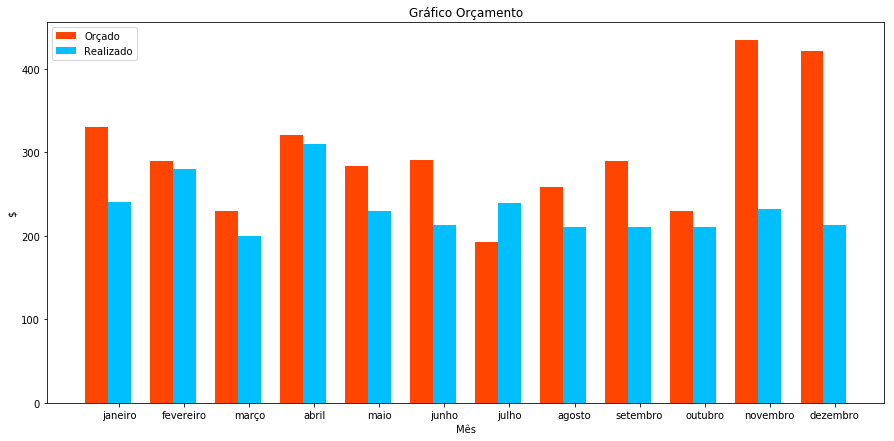

<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
    
labels = merge_data['mês']
orcado = merge_data['orcado']
realizado = merge_data['realizado']

width = 0.35

plt.figure(figsize=(15,7))

r1 = np.arange(len(labels))
r2 = [x+width for x in r1]

plt.bar(r1, orcado, color='#FF4500', width=width, label="Orçado")
plt.bar(r2, realizado, color='#00BFFF', width=width, label="Realizado")

plt.xlabel('Mês')
plt.xticks([r + width for r in range(len(labels))], ['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho', 'julho', 'agosto', 'setembro', 'outubro', 'novembro', 'dezembro'])
plt.ylabel('$')
plt.title('Gráfico Orçamento')

plt.legend()
plt.show()
plt.savefig('grafico.png', format='png')

### Exportando o dataframe para arquivo .csv:

In [23]:
merge_data.to_csv(r'C:\Users\Weider\Dropbox\Desafio técnico\dados_de_saida.csv')